In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [9]:
cdfparam = dict({'A':0.4137 , 'tau1':0.9 , 'tau2':0.76, 'b':24 })

In [22]:
def SJK_CDF(t):
    A = cdfparam['A']
    b = cdfparam['b']
    tau1 = cdfparam['tau1']
    tau2 = cdfparam['tau2']
    return A*(1.0-np.exp(-t/tau1) + np.exp((t-b)/tau2))

def Expon_CDF(t):
    lamb = 1/24.0 
    return (1.0 - np.exp(-lamb*t))


In [20]:
func_approx_4_param_expon(24.3)

1.0276281584817342

In [23]:
def job_fail_prob(job_len, start_time):
    p_fail = 0.0
    end_time = job_len + start_time 
    if end_time > 24.3:
        p_fail = 1.0 
        return p_fail 
    p_fail = SJK_CDF(end_time) - SJK_CDF(start_time)
    return p_fail 

In [28]:
def smart_job_fail_prob(job_len, start_time):
    p_fail = 0.0
    end_time = job_len + start_time 
    if end_time > 24.3:
        #start a new one for sure 
        p_fail_new = SJK_CDF(job_len) - SJK_CDF(0)
        return p_fail_new
    else:
        p_fail_old = SJK_CDF(end_time) - SJK_CDF(start_time)
        p_fail_new = SJK_CDF(job_len) - SJK_CDF(0)
        return min(p_fail_new, p_fail_old)

In [47]:
smart_job_fail_prob(8, 16.7)

0.4136429457683769

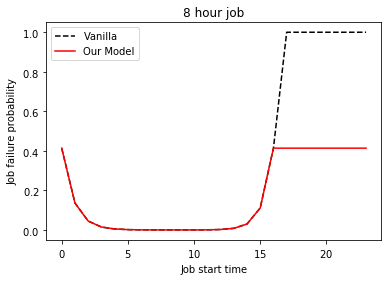

In [63]:
plt.plot([job_fail_prob(8,s) for s in range(0,24)], ls='--', color='k', label="Vanilla")
plt.plot([smart_job_fail_prob(8,s) for s in range(0,24)], color='r', label="Our Model")
plt.legend()
plt.xlabel("Job start time")
plt.ylabel("Job failure probability")
plt.title("8 hour job")
plt.savefig("../graphs/Sched-bathtub.pdf")

In [38]:
def avg_fail_prob(job_len):
    return np.mean([job_fail_prob(job_len, s) for s in range(0,24)])

def smart_avg_fail_prob(job_len):
    return np.mean([smart_job_fail_prob(job_len, s) for s in range(0,24)])

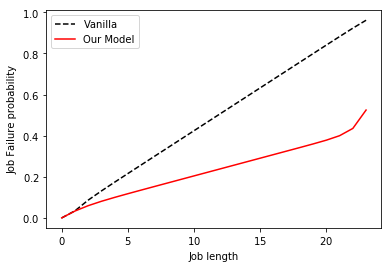

In [62]:
plt.plot([avg_fail_prob(job_len) for job_len in range(0,24)], ls='--', color='k', label="Vanilla")
plt.plot([smart_avg_fail_prob(job_len) for job_len in range(0,24)], color='r', label="Our Model")
plt.legend()
plt.xlabel("Job length")
plt.ylabel("Job Failure probability")
plt.savefig("../graphs/Sched-fail-prob.pdf")